In [13]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the data

In [39]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")  # Chargement du fichier avec numpy
    y = data[:, 0]                               # 1ère colonne : classe
    x = data[:, 1:]                              # Reste du tableau : les timeseries (en lignes ?)
    return x, y.astype(int)                      # Nos classes sont ici des entiers


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")   # Données d'entraînement
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")      # Données d'application finale ?

# Visualize one timeseries per class.

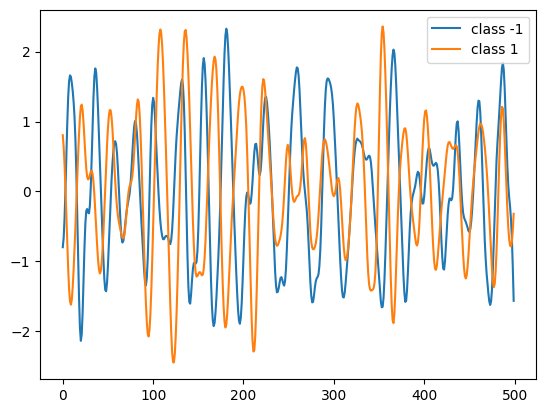

In [15]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]                # Sélection de la classe c avec un masque.
    plt.plot(c_x_train[0], label="class " + str(c))  # On choisit de visualiser la première timelines (ligne)
plt.legend(loc="best")
plt.show()
plt.close()

# Standardize the data

In [44]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1)) # On a juste transformé les valeurs en tab à un élt
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

num_classes = len(np.unique(y_train)) # Nombre de classes

idx = np.random.permutation(len(x_train)) # Permutation aléatoire de [|0; len(x_train)|]
x_train = x_train[idx] # On permute aléatoirement l'ordre des timeseries d'entraînement
y_train = y_train[idx] 

y_train[y_train == -1] = 0 # On met l'étiquette 0 sur la classe -1
y_test[y_test == -1] = 0

# Build a model

In [17]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Train the model

In [21]:
epochs = 50
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
90/90 [==============================] - 6s 57ms/step - loss: 0.2342 - sparse_categorical_accuracy: 0.9080 - val_loss: 1.3596 - val_sparse_categorical_accuracy: 0.5534 - lr: 0.0010
Epoch 2/50
90/90 [==============================] - 5s 57ms/step - loss: 0.2240 - sparse_categorical_accuracy: 0.9132 - val_loss: 0.3566 - val_sparse_categorical_accuracy: 0.8169 - lr: 0.0010
Epoch 3/50
90/90 [==============================] - 5s 58ms/step - loss: 0.2226 - sparse_categorical_accuracy: 0.9146 - val_loss: 0.2966 - val_sparse_categorical_accuracy: 0.8807 - lr: 0.0010
Epoch 4/50
90/90 [==============================] - 5s 58ms/step - loss: 0.2250 - sparse_categorical_accuracy: 0.9118 - val_loss: 0.2132 - val_sparse_categorical_accuracy: 0.9112 - lr: 0.0010
Epoch 5/50
90/90 [==============================] - 5s 57ms/step - loss: 0.2027 - sparse_categorical_accuracy: 0.9212 - val_loss: 0.3152 - val_sparse_categorical_accuracy: 0.8613 - lr: 0.0010
Epoch 6/50
90/90 [======================

90/90 [==============================] - 5s 55ms/step - loss: 0.1024 - sparse_categorical_accuracy: 0.9653 - val_loss: 0.1287 - val_sparse_categorical_accuracy: 0.9695 - lr: 0.0010
Epoch 44/50
90/90 [==============================] - 5s 55ms/step - loss: 0.1023 - sparse_categorical_accuracy: 0.9622 - val_loss: 0.1281 - val_sparse_categorical_accuracy: 0.9667 - lr: 0.0010
Epoch 45/50
90/90 [==============================] - 5s 55ms/step - loss: 0.1125 - sparse_categorical_accuracy: 0.9611 - val_loss: 0.1854 - val_sparse_categorical_accuracy: 0.9140 - lr: 0.0010
Epoch 46/50
90/90 [==============================] - 5s 55ms/step - loss: 0.1088 - sparse_categorical_accuracy: 0.9684 - val_loss: 0.6512 - val_sparse_categorical_accuracy: 0.7393 - lr: 0.0010
Epoch 47/50
90/90 [==============================] - 5s 55ms/step - loss: 0.0994 - sparse_categorical_accuracy: 0.9660 - val_loss: 0.6143 - val_sparse_categorical_accuracy: 0.7781 - lr: 0.0010
Epoch 48/50
90/90 [============================

Evaluate model on test data

In [22]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 1s 11ms/step - loss: 0.1015 - sparse_categorical_accuracy: 0.9682
Test accuracy 0.9681817889213562
Test loss 0.10149197280406952


Plot the model's training and validation loss

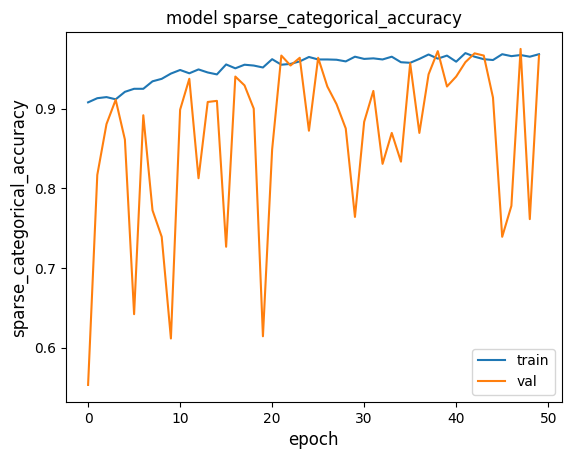

In [23]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()